### Statistical Analysis Functions and Toy Data

In [1]:
import numpy as np
from scipy import stats as scipy_stats
from typing import List, Tuple
import matplotlib.pyplot as plt

def analyze_vector_feature_scalar_correlations(
    vectors: List[List[float]],
    scalars: List[float],
    feature_names: List[str] = None
) -> dict:
    """
    Analyzes correlation between feature vectors and a target scalar value.
    
    Parameters:
    -----------
    vectors : List[List[float]]
        List of vectors, where each vector is a list of float values
    scalars : List[float]]
        List of scalar values corresponding to each vector
    feature_names : List[str], optional
        Names of the features in the vectors
        
    Returns:
    --------
    dict : Dictionary containing correlation statistics for each feature
    """
    # Convert inputs to numpy arrays
    X = np.array(vectors)
    y = np.array(scalars)
    
    # Validate input dimensions
    if X.shape[0] != len(y):
        raise ValueError("Number of vectors must match number of scalars")
    
    # Generate default feature names if not provided
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(X.shape[1])]
    
    # Calculate correlations for each feature
    correlations = {}
    for i, feature_name in enumerate(feature_names):
        # Pearson correlation
        pearson_corr, pearson_p = scipy_stats.pearsonr(X[:, i], y)
        
        correlations[feature_name] = {
            'pearson_correlation': pearson_corr,
            'pearson_p_value': pearson_p
        }
    
    return correlations

def plot_feature_correlations(
    correlations: dict,
    figsize: Tuple[int, int] = (10, 5),
    title: str = "Feature-Target Correlations",
    xlabel: str = "Features",
    ylabel: str = "Correlation Coefficient",
) -> None:
    """
    Plots a bar chart of feature-target correlations.
    
    Parameters:
    -----------
    correlations : dict
        Dictionary containing correlation statistics for each feature
    figsize : Tuple[int, int]
        Size of the figure to plot
    title : str
        Title of the plot
    xlabel : str
        Label of the x-axis
    ylabel : str
        Label of the y-axis
    """
    features = list(correlations.keys())
    pearson_corrs = [stats['pearson_correlation'] for stats in correlations.values()]
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(features, pearson_corrs)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Add correlation values as text above or below bars depending on value
    for i, corr in enumerate(pearson_corrs):
        va = 'bottom' if corr >= 0 else 'top'
        y_offset = 0 if corr >= 0 else -0.001
        ax.text(i, corr + y_offset, f'{corr:.2f}', ha='center', va=va)
    
    plt.tight_layout()
    plt.show()


Correlations for x:
pearson_correlation: 0.975
pearson_p_value: 0.000

Correlations for y:
pearson_correlation: 0.997
pearson_p_value: 0.000

Correlations for z:
pearson_correlation: 0.994
pearson_p_value: 0.000

Correlations for w:
pearson_correlation: 0.996
pearson_p_value: 0.000


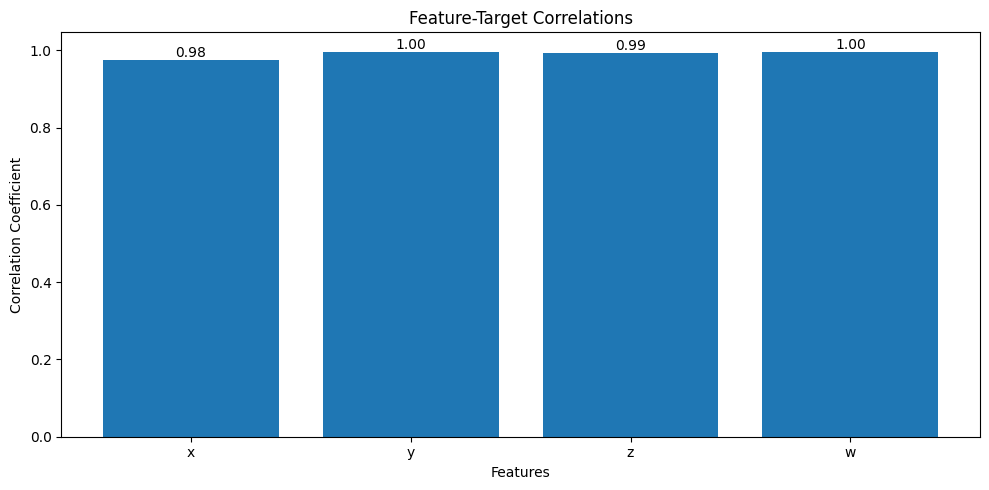

In [2]:
# Example usage with noise
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create base vectors with linear relationships
base_vectors = [
    [1.0, 2.0, 3.0, 4.0],
    [2.0, 4.0, 6.0, 8.0],
    [3.0, 6.0, 9.0, 12.0],
    [4.0, 8.0, 12.0, 16.0],
    [5.0, 10.0, 15.0, 20.0],
    [6.0, 12.0, 18.0, 24.0],
    [7.0, 14.0, 21.0, 28.0],
    [8.0, 16.0, 24.0, 32.0]
]

# Add random noise to vectors
vectors = np.array(base_vectors) + np.random.normal(0, 0.5, (len(base_vectors), 4))

# Create scalars with noise
base_scalars = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
scalars = base_scalars + np.random.normal(0, 2.0, len(base_scalars))

feature_names = ['x', 'y', 'z', 'w']

# Analyze correlations
correlations = analyze_vector_feature_scalar_correlations(
    vectors, scalars, feature_names
)

# Print correlation statistics
for feature, stats in correlations.items():
    print(f"\nCorrelations for {feature}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.3f}")

# Plot correlations
plot_feature_correlations(correlations)

In [3]:
import numpy as np
from scipy import stats as scipy_stats
from typing import List, Tuple
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def analyze_vector_scalar_correlation(
    vectors: List[List[float]],
    scalars: List[float]
) -> dict:
    """
    Analyzes correlation between whole vectors and scalar values using multiple methods.
    
    Parameters:
    -----------
    vectors : List[List[float]]
        List of vectors, where each vector is a list of float values
    scalars : List[float]
        List of scalar values corresponding to each vector
        
    Returns:
    --------
    dict : Dictionary containing correlation statistics and vector similarities
    """
    # Convert inputs to numpy arrays
    X = np.array(vectors)
    y = np.array(scalars)
    
    # Validate input dimensions
    if X.shape[0] != len(y):
        raise ValueError("Number of vectors must match number of scalars")
    
    # 1. Vector magnitude correlation
    magnitudes = np.linalg.norm(X, axis=1)
    magnitude_corr, magnitude_p = scipy_stats.pearsonr(magnitudes, y)
    
    # 2. Normalized vector correlation (using first vector as reference)
    normalized_vectors = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
    reference_vector = normalized_vectors[0]
    similarities = np.array([np.dot(v, reference_vector) for v in normalized_vectors])
    similarity_corr, similarity_p = scipy_stats.pearsonr(similarities, y)
    
    # 3. Principal component correlation
    # Standardize the vectors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Get first principal component
    U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
    pc1_scores = U[:, 0] * S[0]
    pc1_corr, pc1_p = scipy_stats.pearsonr(pc1_scores, y)
    
    return {
        'magnitude': {
            'correlation': magnitude_corr,
            'p_value': magnitude_p,
            'vector_values': magnitudes
        },
        'similarity': {
            'correlation': similarity_corr,
            'p_value': similarity_p,
            'vector_values': similarities
        },
        'principal_component': {
            'correlation': pc1_corr,
            'p_value': pc1_p,
            'vector_values': pc1_scores
        }
    }

def plot_vector_correlations(
    vectors: np.ndarray,
    scalars: np.ndarray,
    results: dict,
    figsize: Tuple[int, int] = (15, 5)
) -> None:
    """
    Creates scatter plots showing different vector-scalar relationships.
    
    Parameters:
    -----------
    vectors : np.ndarray
        Original vector data
    scalars : np.ndarray
        Original scalar data
    results : dict
        Results from analyze_vector_scalar_correlation
    figsize : Tuple[int, int]
        Size of the figure to plot
    """
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # Plot 1: Vector Magnitude vs Scalar
    axes[0].scatter(results['magnitude']['vector_values'], scalars)
    axes[0].set_xlabel('Vector Magnitude')
    axes[0].set_ylabel('Scalar Value')
    axes[0].set_title(f"Magnitude Correlation\nr = {results['magnitude']['correlation']:.3f}")
    
    # Plot 2: Vector Similarity vs Scalar
    axes[1].scatter(results['similarity']['vector_values'], scalars)
    axes[1].set_xlabel('Similarity to Reference Vector')
    axes[1].set_ylabel('Scalar Value')
    axes[1].set_title(f"Similarity Correlation\nr = {results['similarity']['correlation']:.3f}")
    
    # Plot 3: First Principal Component vs Scalar
    axes[2].scatter(results['principal_component']['vector_values'], scalars)
    axes[2].set_xlabel('First Principal Component')
    axes[2].set_ylabel('Scalar Value')
    axes[2].set_title(f"PC1 Correlation\nr = {results['principal_component']['correlation']:.3f}")
    
    plt.tight_layout()
    plt.show()


Magnitude correlation:
Correlation: 0.996
P-value: 0.000

Similarity correlation:
Correlation: -0.198
P-value: 0.639

Principal_Component correlation:
Correlation: 0.997
P-value: 0.000


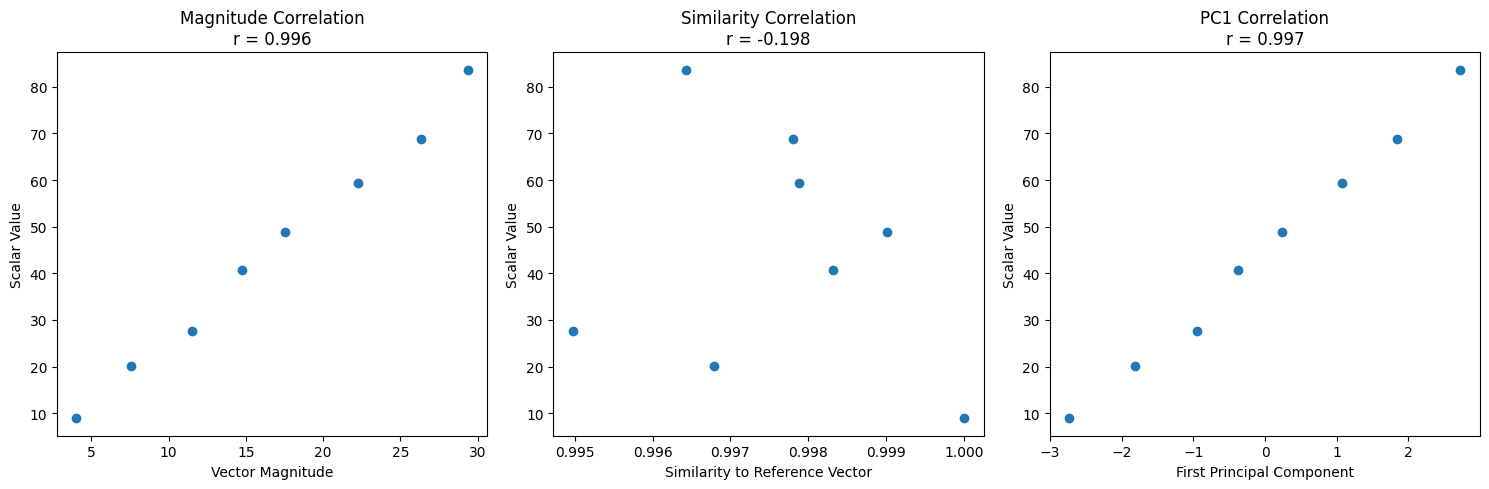

In [4]:
# Example usage with noise
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create base vectors with linear relationships
base_vectors = [
    [1.0, 2.0, 3.0],
    [2.0, 4.0, 6.0],
    [3.0, 6.0, 9.0],
    [4.0, 8.0, 12.0],
    [5.0, 10.0, 15.0],
    [6.0, 12.0, 18.0],
    [7.0, 14.0, 21.0],
    [8.0, 16.0, 24.0]
]

# Add random noise to vectors
vectors = np.array(base_vectors) + np.random.normal(0, 0.5, (len(base_vectors), 3))

# Create scalars with noise
base_scalars = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
scalars = base_scalars + np.random.normal(0, 2.0, len(base_scalars))

# Analyze correlations
results = analyze_vector_scalar_correlation(vectors, scalars)

# Print results
for method, stats in results.items():
    print(f"\n{method.title()} correlation:")
    print(f"Correlation: {stats['correlation']:.3f}")
    print(f"P-value: {stats['p_value']:.3f}")

# Plot correlations
plot_vector_correlations(vectors, scalars, results)

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from typing import List, Dict
from mpl_toolkits.mplot3d import Axes3D

def analyze_vector_regression(
    vectors: List[List[float]],
    scalars: List[float],
    feature_names: List[str] = None
) -> Dict:
    """
    Analyzes the relationship between vectors and scalars using linear regression.
    
    Parameters:
    -----------
    vectors : List[List[float]]
        List of input vectors
    scalars : List[float]
        List of target scalar values
    feature_names : List[str], optional
        Names of the vector components
        
    Returns:
    --------
    dict : Dictionary containing regression results and predictions
    """
    X = np.array(vectors)
    y = np.array(scalars)
    
    # Generate default feature names if not provided
    if feature_names is None:
        feature_names = [f"Component_{i+1}" for i in range(X.shape[1])]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    return {
        'model': model,
        'feature_names': feature_names,
        'coefficients': dict(zip(feature_names, model.coef_)),
        'intercept': model.intercept_,
        'X': X,
        'y_true': y,
        'y_pred': y_pred,
        'r2': r2,
        'rmse': rmse
    }

def plot_regression_results(results: Dict) -> None:
    """
    Creates visualization plots for regression analysis results.
    
    Parameters:
    -----------
    results : dict
        Results from analyze_vector_regression
    """
    fig = plt.figure(figsize=(15, 10))
    
    # Plot 1: Actual vs Predicted
    ax1 = fig.add_subplot(221)
    ax1.scatter(results['y_true'], results['y_pred'], alpha=0.5)
    
    # Add diagonal line
    min_val = results['y_true'].min()
    max_val = results['y_true'].max()
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(f'Actual vs Predicted Values\nR² = {results["r2"]:.3f}')
    
    # Plot 2: Coefficient Values
    ax2 = fig.add_subplot(222)
    coef_items = list(results['coefficients'].items())
    features = [x[0] for x in coef_items]
    coefs = [x[1] for x in coef_items]
    
    ax2.bar(features, coefs)
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Coefficient Value')
    ax2.set_title('Feature Coefficients')
    plt.xticks(rotation=45)
    
    # Plot 3: Residuals
    ax3 = fig.add_subplot(223)
    residuals = results['y_true'] - results['y_pred']
    
    ax3.scatter(results['y_pred'], residuals, alpha=0.5)
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    
    ax3.set_xlabel('Predicted Values')
    ax3.set_ylabel('Residuals')
    ax3.set_title(f'Residual Plot\nRMSE = {results["rmse"]:.3f}')
    
    # Plot 4: 3D visualization (if 3 components)
    if len(results['feature_names']) == 3:
        ax4 = fig.add_subplot(224, projection='3d')
        scatter = ax4.scatter(results['X'][:, 0],
                            results['X'][:, 1],
                            results['X'][:, 2],
                            c=results['y_true'],
                            cmap='viridis')
        ax4.set_xlabel(results['feature_names'][0])
        ax4.set_ylabel(results['feature_names'][1])
        ax4.set_zlabel(results['feature_names'][2])
        ax4.set_title('3D Vector Space\n(color = scalar value)')
        plt.colorbar(scatter)
    
    plt.tight_layout()
    plt.show()
    
    # Print model summary
    print("\nRegression Equation:")
    print(f"scalar = {results['intercept']:.2f}", end='')
    for name, coef in results['coefficients'].items():
        print(f" + {coef:.2f}*{name}", end='')
    print("\n")
    
    print("Model Performance:")
    print(f"R² = {results['r2']:.3f}")
    print(f"RMSE = {results['rmse']:.3f}")

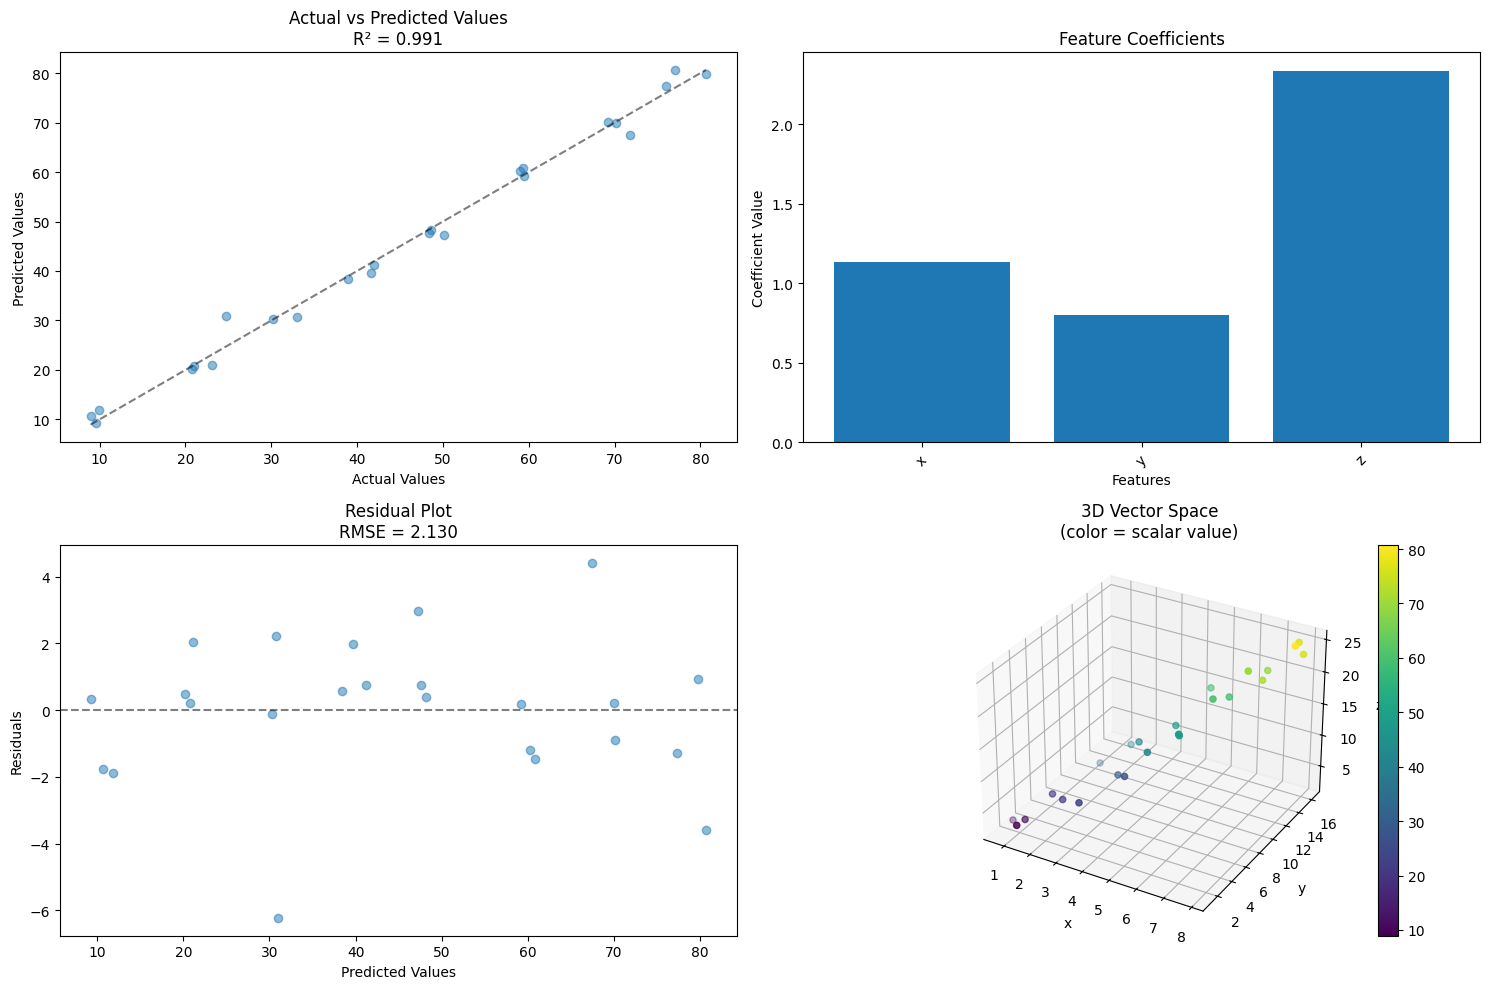


Regression Equation:
scalar = 1.09 + 1.14*x + 0.80*y + 2.34*z

Model Performance:
R² = 0.991
RMSE = 2.130


In [6]:
# Example usage with noise
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create base vectors with linear relationships
base_vectors = [
    [1.0, 2.0, 3.0],
    [2.0, 4.0, 6.0],
    [3.0, 6.0, 9.0],
    [4.0, 8.0, 12.0],
    [5.0, 10.0, 15.0],
    [6.0, 12.0, 18.0],
    [7.0, 14.0, 21.0],
    [8.0, 16.0, 24.0]
] * 3  # Replicate data to have more samples

# Add random noise to vectors
vectors = np.array(base_vectors) + np.random.normal(0, 0.5, (len(base_vectors), 3))

# Create scalars with noise
base_scalars = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0] * 3)
scalars = base_scalars + np.random.normal(0, 2.0, len(base_scalars))

# Run regression analysis
results = analyze_vector_regression(
    vectors, 
    scalars,
    feature_names=['x', 'y', 'z']
)

# Plot results
plot_regression_results(results)

### Bispectra Correlation Analysis

In [12]:
# Read the bispectra and bader charges data
import pandas as pd

# Read the bispectra data
bispectra_df = pd.read_csv('../../data/aflow/aflow_bispectra.csv')

# Read the bader charges data 
bader_charges_df = pd.read_csv('../../data/aflow/aflow_bader_charges.csv')


In [13]:
from tqdm import tqdm

bispectra = []
bader_charges = []

for index, row in tqdm(bispectra_df.iterrows()):
    bispectra.append(eval(row['bispectrum']))
    site_index = row['site_index']
    cif_name = row['cif_name']
    cif_bader_charges = bader_charges_df[bader_charges_df['cif_name'] == cif_name]
    bader_charge = cif_bader_charges[str(site_index)].item()
    bader_charges.append(bader_charge)


100000it [07:12, 231.30it/s]



Correlations for 0:
pearson_correlation: 0.021
pearson_p_value: 0.000

Correlations for 1:
pearson_correlation: -0.016
pearson_p_value: 0.000

Correlations for 2:
pearson_correlation: 0.014
pearson_p_value: 0.000

Correlations for 3:
pearson_correlation: 0.001
pearson_p_value: 0.674

Correlations for 4:
pearson_correlation: 0.047
pearson_p_value: 0.000

Correlations for 5:
pearson_correlation: -0.000
pearson_p_value: 0.957

Correlations for 6:
pearson_correlation: 0.020
pearson_p_value: 0.000

Correlations for 7:
pearson_correlation: -0.026
pearson_p_value: 0.000

Correlations for 8:
pearson_correlation: 0.006
pearson_p_value: 0.052

Correlations for 9:
pearson_correlation: -0.025
pearson_p_value: 0.000

Correlations for 10:
pearson_correlation: -0.010
pearson_p_value: 0.002

Correlations for 11:
pearson_correlation: 0.005
pearson_p_value: 0.105

Correlations for 12:
pearson_correlation: -0.024
pearson_p_value: 0.000

Correlations for 13:
pearson_correlation: 0.018
pearson_p_value: 0.

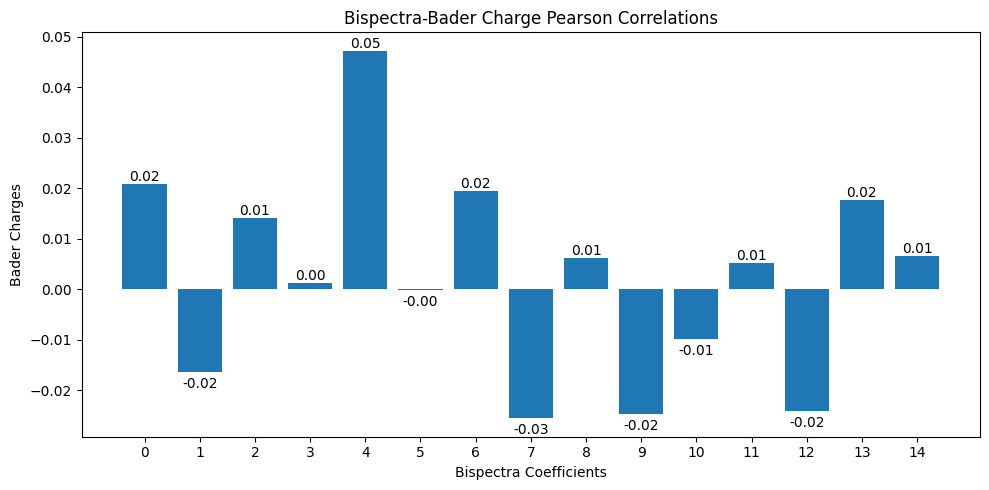

In [14]:
feature_names = [str(i) for i in range(15)]

# Analyze correlations
correlations = analyze_vector_feature_scalar_correlations(
    bispectra, bader_charges, feature_names
)

# Print correlation statistics
for feature, stats in correlations.items():
    print(f"\nCorrelations for {feature}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.3f}")

# Plot correlations
plot_feature_correlations(correlations, title="Bispectra-Bader Charge Pearson Correlations", xlabel="Bispectra Coefficients", ylabel="Bader Charges")


Magnitude correlation:
Correlation: 0.027
P-value: 0.000

Similarity correlation:
Correlation: 0.055
P-value: 0.000

Principal_Component correlation:
Correlation: -0.002
P-value: 0.548


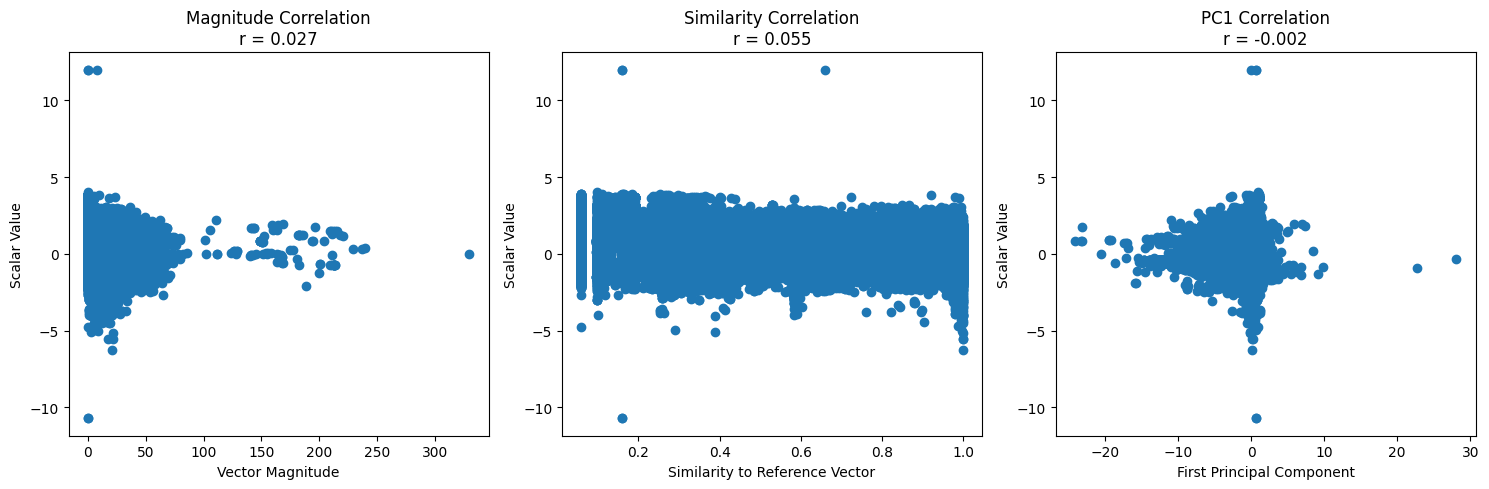

In [15]:
# Analyze correlations
results = analyze_vector_scalar_correlation(bispectra, bader_charges)

# Print results
for method, stats in results.items():
    print(f"\n{method.title()} correlation:")
    print(f"Correlation: {stats['correlation']:.3f}")
    print(f"P-value: {stats['p_value']:.3f}")

# Plot correlations
plot_vector_correlations(bispectra, bader_charges, results)

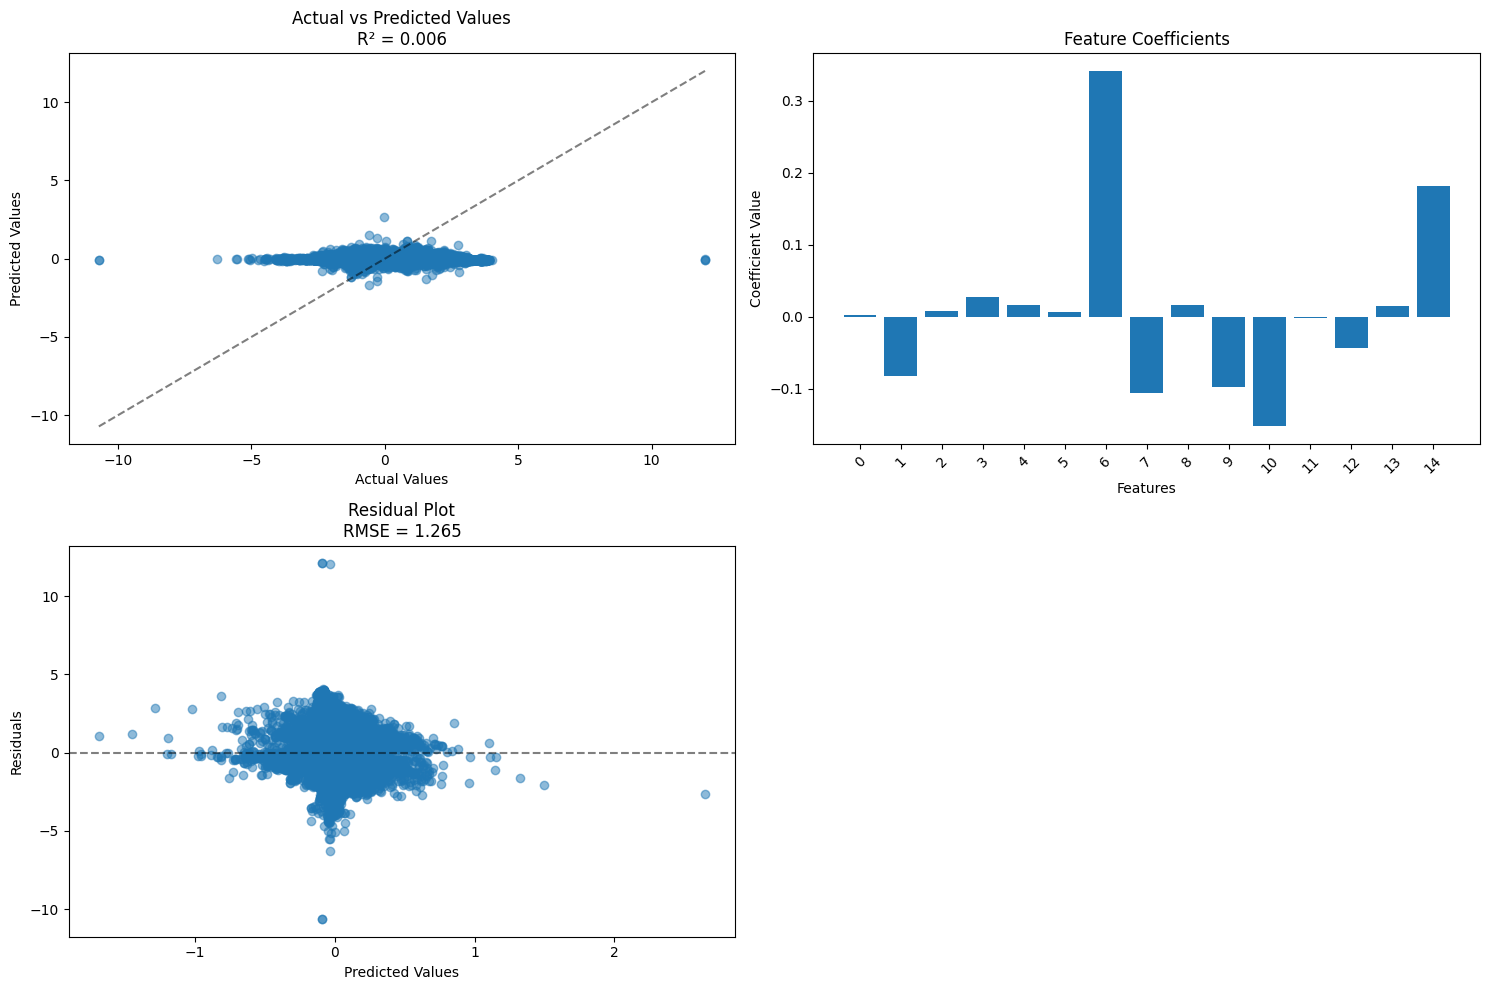


Regression Equation:
scalar = -0.08 + 0.00*0 + -0.08*1 + 0.01*2 + 0.03*3 + 0.02*4 + 0.01*5 + 0.34*6 + -0.11*7 + 0.02*8 + -0.10*9 + -0.15*10 + -0.00*11 + -0.04*12 + 0.01*13 + 0.18*14

Model Performance:
R² = 0.006
RMSE = 1.265


In [16]:
# Run regression analysis
results = analyze_vector_regression(
    bispectra, 
    bader_charges,
    feature_names=[str(i) for i in range(15)]
)

# Plot results
plot_regression_results(results)